### School - Midterm and Final Avg comparison for each book.
___

<br>

#### General setup
___

In [1]:
# loading packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# styling for plots
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (6,5)

<br>

#### Loading and rendering data

In [3]:
# render the excel files for midterm and final exams for each book
def prep_file(path):
    books = pd.read_excel(path).T
    books.columns = books[:1].values.tolist()[0]
    books.drop('Course', axis=0, inplace=True)
    return books

In [4]:
# load the data
midterm = prep_file('Data/school/midterm_from_report.xlsx')
final = prep_file('Data/school/final_from_report.xlsx')
midterm

,Oxford Discover 1,NaN,Oxford Discover 3,NaN,Oxford Discover 4,NaN,Solutions Intermediate,NaN,Solutions Upper-Intermediate,NaN
Part 1,Vocabulary,3.91,Vocabulary,4.07,Vocabulary,3.2,Vocabulary,3.35,Vocabulary,3.24
Part 2,Grammar 1,3.38,NaN,NaN,Grammar 1,4.4,NaN,NaN,NaN,NaN
Part 3,Grammar 2,4.81,NaN,NaN,Grammar 2,2.5,NaN,NaN,NaN,NaN
Part 4,Reading,3.78,Reading,3.13,Reading,3,Reading,1.95,Reading,2.08
Part 5,Listening,4.28,Listening,4.22,Listening,3.9,Listening,2.9,Listening,2.76


In [5]:
midterm.reset_index(drop=True, inplace=True)
midterm.columns = midterm.columns.fillna('Midterm Avg')
midterm

,Oxford Discover 1,Midterm Avg,Oxford Discover 3,Midterm Avg,Oxford Discover 4,Midterm Avg,Solutions Intermediate,Midterm Avg,Solutions Upper-Intermediate,Midterm Avg
0,Vocabulary,3.91,Vocabulary,4.07,Vocabulary,3.2,Vocabulary,3.35,Vocabulary,3.24
1,Grammar 1,3.38,NaN,NaN,Grammar 1,4.4,NaN,NaN,NaN,NaN
2,Grammar 2,4.81,NaN,NaN,Grammar 2,2.5,NaN,NaN,NaN,NaN
3,Reading,3.78,Reading,3.13,Reading,3,Reading,1.95,Reading,2.08
4,Listening,4.28,Listening,4.22,Listening,3.9,Listening,2.9,Listening,2.76


In [6]:
final.reset_index(drop=True, inplace=True)
final.columns = final.columns.fillna('Final Avg')
final

,Oxford Discover 1,Final Avg,Oxford Discover 3,Final Avg,Oxford Discover 4,Final Avg,Solutions Intermediate,Final Avg,Solutions Upper-Intermediate,Final Avg
0,Vocabulary,4.42,Vocabulary,4.86,Vocabulary,4.51,Vocabulary,3.84,Vocabulary,4.88
1,Grammar 1,4.22,NaN,NaN,Grammar 1,4.64,NaN,NaN,NaN,NaN
2,Grammar 2,2.32,NaN,NaN,Grammar 2,4.25,NaN,NaN,NaN,NaN
3,Reading,3.35,Reading,3.14,Reading,4.51,Reading,2.47,Reading,3.34
4,Listening,3.77,Listening,3.65,Listening,4.15,Listening,3.11,Listening,2.5


In [7]:
# separate books
oxf_disc_1 = midterm.iloc[:, 0:2]
oxf_disc_1 = oxf_disc_1.join(final.iloc[:, 0:2]['Final Avg']).dropna(axis=0)

# do the same for all
oxf_disc_3 = midterm.iloc[:, 2:4]
oxf_disc_3 = oxf_disc_3.join(final.iloc[:, 2:4]['Final Avg']).dropna(axis=0)

oxf_disc_4 = midterm.iloc[:, 4:6]
oxf_disc_4 = oxf_disc_4.join(final.iloc[:, 4:6]['Final Avg']).dropna(axis=0)

sol_int = midterm.iloc[:, 6:8]
sol_int = sol_int.join(final.iloc[:, 6:8]['Final Avg']).dropna(axis=0)

sol_up = midterm.iloc[:, 8:10]
sol_up = sol_up.join(final.iloc[:, 8:10]['Final Avg']).dropna(axis=0)
sol_up.dropna(axis=0)

,Solutions Upper-Intermediate,Midterm Avg,Final Avg
0,Vocabulary,3.24,4.88
3,Reading,2.08,3.34
4,Listening,2.76,2.5


In [8]:
# three parts book
books_3 = [oxf_disc_3, sol_int, sol_up]
for book in books_3:
    book.index = sol_up.iloc[:, 0]
    book.index.name = 'Part'
    book.drop(book.columns[0], axis=1, inplace=True)

In [9]:
# five part books
books_5 = [oxf_disc_1, oxf_disc_4]
for book in books_5:
    book.index = midterm.iloc[:, 0]
    book.index.name = 'Part'
    book.drop(book.columns[0], axis=1, inplace=True)

<br>

#### Plotting 
___

In [10]:
# list of book labels
book_labels_3 = ['Oxford Discover 3', 'Solutions Intermediate', 'Solutions Upper-Intermediate']
book_labels_5 = ['Oxford Discover 1', 'Oxford Discover 4']

# comparison of results for each book
def plot(data, label):
    fig, ax = plt.subplots()
    sub = fig.suptitle(label)
    data[['Midterm Avg','Final Avg']].plot.bar(ax=ax)
    ax.set(title='Midterm vs Final Exam Results', ylabel='Avg Scores')

    # display legend and move it outside the plot
    lgd = ax.legend(frameon=True, fancybox=True, shadow=True, bbox_to_anchor=(1.03, 1))
    plt.xticks(rotation=45)
    plt.savefig(f'Data/school/school_report/{label} - parts.png', bbox_inches='tight', bbox_extra_artists=(lgd,sub));

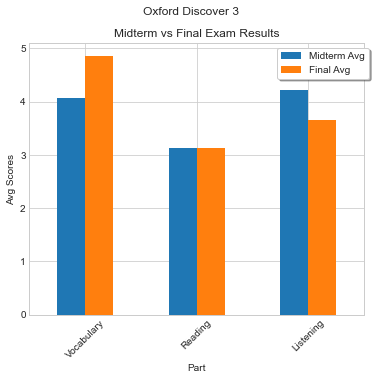

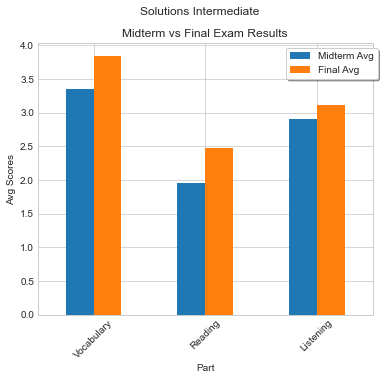

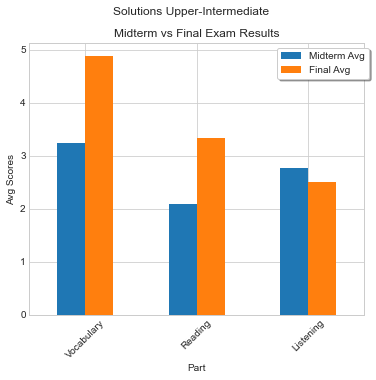

In [11]:
# plot all data
for b, l in (zip(books_3, book_labels_3)):
    plot(b,l)

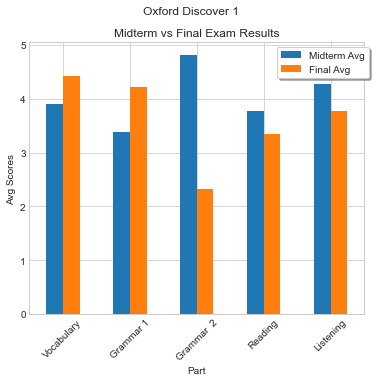

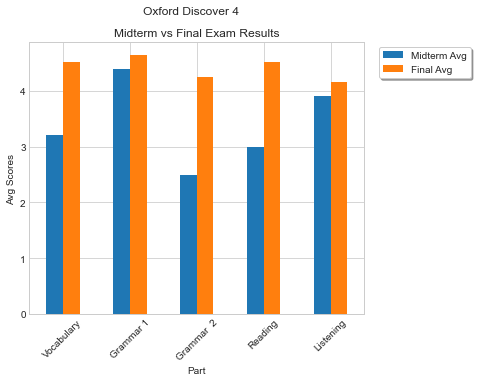

In [12]:
# plot all data
for b, l in (zip(books_5, book_labels_5)):
    plot(b,l)

In [13]:
# comparison of results for each book
def plot_overall_result(label):
    # load the data
    midterm = pd.read_excel('Data/school/midterm/' + label + ' - midterm.xlsx')
    final = pd.read_excel('Data/school/finals/' + label + ' - final.xlsx')
    two_tests = midterm.merge(final, on=['Firstname', 'Surname'])
    school = pd.DataFrame(two_tests[['Midterm Exam', 'Final Exam']].mean())
    school.columns = ['The school']
    school['School A'] = pd.read_excel('Data/school/A/' + label + '.xlsx').T
    school['School B'] = pd.read_excel('Data/school/B/' + label + '.xlsx').T

    # plot it
    fig, ax = plt.subplots()
    sub = fig.suptitle(label)
    school.T.plot.bar(color=['mediumaquamarine', 'lightcoral'], ax=ax)
    ax.set(title='Midterm vs Final Exam Results', ylabel='Avg Score')
    
    # text on the plot
    # the main school
    if -1.5 < np.round(school['The school']['Final Exam'] - school['The school']['Midterm Exam'],1) < 1.5:
        ax.text(x=.06, y=(school['The school']['Final Exam'] + school['The school']['Midterm Exam']) / 2.15 , s = f"{np.round(school['The school']['Final Exam'] - school['The school']['Midterm Exam'],1)}")
    else:  
        ax.text(x=.06, y=(school['The school']['Final Exam']+ school['The school']['Midterm Exam']) / 2 , s = f"{np.round(school['The school']['Final Exam'] - school['The school']['Midterm Exam'],1)}")
    
    # school A
    if -1.5 < np.round(school['School A']['Final Exam'] - school['School A']['Midterm Exam'],1) < 1.5:
        ax.text(x=1.05, y=(school['School A']['Final Exam'] + school['School A']['Midterm Exam']) / 2.15 , s = f"{np.round(school['School A']['Final Exam'] - school['School A']['Midterm Exam'],1)}")
    else:  
        ax.text(x=1.05, y=(school['School A']['Final Exam'] + school['School A']['Midterm Exam']) / 2 , s = f"{np.round(school['School A']['Final Exam'] - school['School A']['Midterm Exam'],1)}")
    
    # school B
    if -1.5 < np.round(school['School B']['Final Exam'] - school['School B']['Midterm Exam'].mean(),1) < 1.5:
        ax.text(x=2.05, y=(school['School B']['Final Exam'] + school['School B']['Midterm Exam']) / 2.15, s = f"{np.round(school['School B']['Final Exam'] - school['School B']['Midterm Exam'],1)}")
    else:  
        ax.text(x=2.05, y=(school['School B']['Final Exam'] + school['School B']['Midterm Exam']) / 2, s = f"{np.round(school['School B']['Final Exam'] - school['School B']['Midterm Exam'],1)}")
    
    
    lgd = ax.legend(frameon=True, fancybox=True, shadow=True, bbox_to_anchor=(1.03, 1))
    plt.xticks(rotation=0)
    plt.savefig(f'Data/school/school_report/{label}-overall.png', bbox_inches='tight', bbox_extra_artists=(lgd,sub))
    
    # table for comparison
    compared_to_A = pd.DataFrame(school['The school'] - school['School A']).T
    compared_to_A.loc[1] = school['The school'] - school['School B']
    compared_to_A.index = ['Compared to School A', 'Compared to School B']
    compared_to_A.index.name = 'Other Schools'
    return compared_to_A

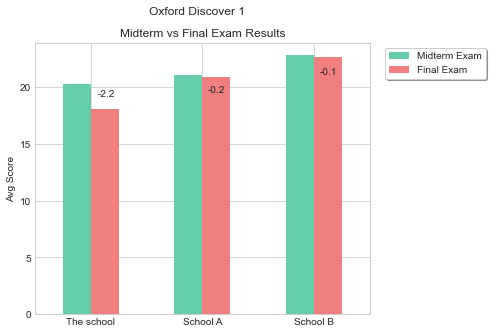

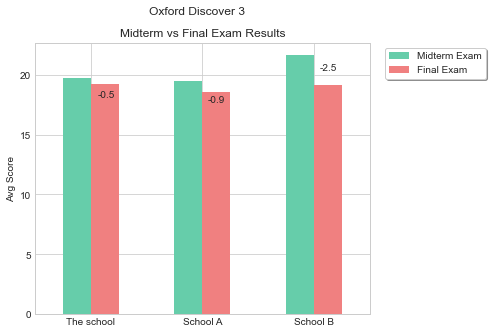

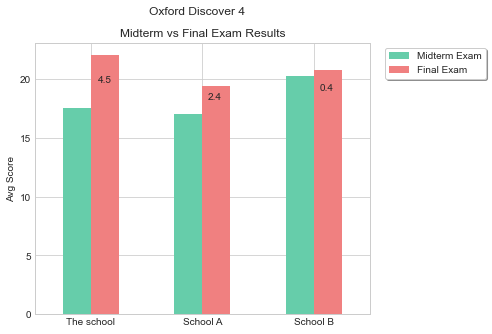

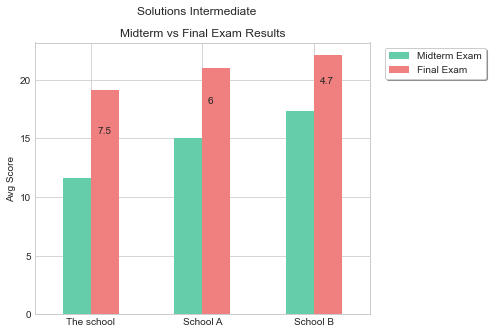

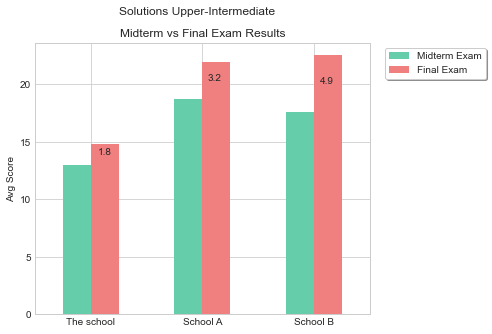

In [14]:
# write and save all dataframes to the excel file
book_labels = ['Oxford Discover 1', 'Oxford Discover 3', 'Oxford Discover 4', 'Solutions Intermediate', 'Solutions Upper-Intermediate']

for label in book_labels:
    compared_to_A = plot_overall_result(label)
    writer = pd.ExcelWriter('Data/school/school_report/' + label + '.xlsx', engine='xlsxwriter')
    np.round(compared_to_A,1).to_excel(writer, index = True)
    
    # insert the image into the worksheet
    workbook = writer.book
    worksheet = writer.sheets['Sheet1']
    worksheet.insert_image('E1', 'Data/school/school_report/' + label + '-overall.png')
    writer.save()

<br>

___
#### End.